<a href="https://colab.research.google.com/github/mrrkdas/Mini-Projects/blob/main/Linear_Regression_with_California_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras import Input

## Getting to know the Data

In [3]:
data = fetch_california_housing()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
data.data.shape # 20640 entries 8 features per entry

(20640, 8)

In [6]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [7]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [8]:
data.target.shape

(20640,)

## Preprocessing

In [9]:
X = data.data
y = data.target

In [11]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [12]:
# Min Max Scaling
mm_scaler = MinMaxScaler()

X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

## Model with keras functional API

In [18]:
# Simple model
input = Input((8, ))

dense = Dense(64, activation = 'relu')

x = dense(input)
x = Dense(24, activation = 'relu') (x)
x = Dense(8, activation = 'relu') (x)

output = Dense(1) (x)

model = Model(inputs = input, outputs = output)

In [19]:
model.compile(loss = 'MAE', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ["MAE"])

In [21]:
# Early Stopping Callback and Learning Rate Callback

# Early Stopping
es_callback = tf.keras.callbacks.EarlyStopping(monitor = 'MAE', min_delta = 1, patience = 3, mode = 'auto', baseline = None)


# Learning Rate Callback
def scheduler(epoch, lr):
  if epoch < 15:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [23]:
r = model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test), epochs = 100, callbacks = [es_callback, lr_callback])

Epoch 1/100
452/452 [==============================] - 3s 5ms/step - loss: 0.7165 - MAE: 0.7165 - val_loss: 0.5333 - val_MAE: 0.5333 - lr: 0.0010
Epoch 2/100
452/452 [==============================] - 2s 4ms/step - loss: 0.5258 - MAE: 0.5258 - val_loss: 0.5081 - val_MAE: 0.5081 - lr: 0.0010
Epoch 3/100
452/452 [==============================] - 2s 3ms/step - loss: 0.5039 - MAE: 0.5039 - val_loss: 0.4898 - val_MAE: 0.4898 - lr: 0.0010
Epoch 4/100
452/452 [==============================] - 2s 4ms/step - loss: 0.4883 - MAE: 0.4883 - val_loss: 0.4782 - val_MAE: 0.4782 - lr: 0.0010


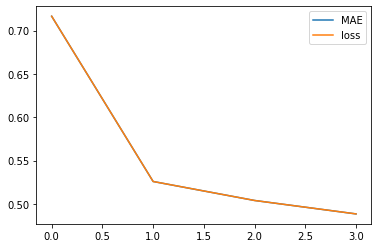

In [25]:
plt.plot(r.history['MAE'], label = 'MAE')
plt.plot(r.history['loss'], label = 'loss')

plt.legend()